### Ch12 Figure6

In [1]:
# "What about a shoe makes it a hit?” He or she works with the data analysts to come up with some interesting questions: Is it the color of the shoe?  Is it some new technology? Was the shoe featured in a magazine and benefited from a network effect?

shoe_sku = np.arange(500)
color = ['red', 'blue', 'white', 'black', 'green', 'orange']
marketing_channel = ['digital news platform', 'blog', 'youtube', 'magazine']
tech = ['gps', 'step-tracker', 'extra-light-material']

data = []

for i in shoe_sku:
    
    
    sales = rd.random() * 10000
    d = [i, sales]
    
    for j in [color, marketing_channel, tech]:
        how_many = rd.randint(0, len(j))
        ary = [0 for x in range(len(j))]
        ary[:how_many] = [1 for j in range(how_many)]
        rd.shuffle(ary)
        d.extend(ary)
    
    data.append(d)
    
df = pd.DataFrame(data, columns=['sku', 'sales', 'red', 'blue', 'white', 'black', 'green', 'orange', 'digital news platform', 'blog', 'youtube', 'magazine', 'gps', 'step-tracker', 'extra-light-material'])
# df.to_csv('csv_output/ch12_fig6.csv', index=False)
df = pd.read_csv('csv_output/ch12_fig6.csv')
df.head()

,sku,sales,red,blue,white,black,green,orange,digital news platform,blog,youtube,magazine,gps,step-tracker,extra-light-material
0,0,2324.697293,0,0,1,1,0,0,0,1,0,0,0,0,0
1,1,2376.396083,0,1,0,0,0,1,1,1,1,0,0,0,0
2,2,8358.150201,1,1,1,1,1,1,0,1,0,0,0,0,0
3,3,6231.947918,1,1,0,0,1,1,0,0,0,1,1,1,1
4,4,8019.105567,0,1,1,1,1,1,1,1,1,0,1,0,0


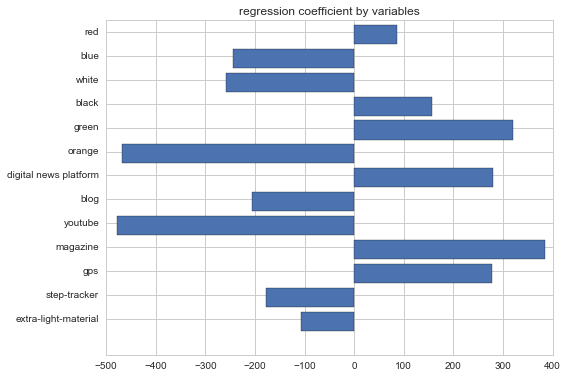

In [2]:
df = pd.read_csv('csv_output/ch12_fig6.csv')

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(1, figsize=(8,6))

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (df.iloc[:,2:], df.iloc[:,1])
ax.barh(width=reg.coef_[::-1], bottom=[x for x in range(1,14)]);
ax.barh(width=0, bottom=0, lw=0)

ax.set_yticks(np.arange(1,14)+.5);
ax.set_yticklabels(['', 'red', 'blue', 'white', 'black', 'green', 'orange', 'digital news platform', 'blog', 'youtube', 'magazine', 'gps', 'step-tracker', 'extra-light-material'][::-1]);

ax.set_title('regression coefficient by variables');
f.savefig('svg_output/ch12_fig6.svg', format='svg')

Using sales value as y variable and colors, marketing channels and technologies as x dummy variables, we can see the top selling products are most likely to have black but not white, orange also helps. It can be intepreted in this way- holding everything else to be the same, if it's advertised on digital news platform, it's likely to help its sales by 200 dollars versus blog will decrese close to 200 dollars.